select from the following gases (1, 2 or 3):
 1) Nitrogen
 2) Carbon Dioxide
 3) Helium
1
Enter the uncompressed volume of the gas in the tube in ml
100


(0.0, 1.0499999999999015)

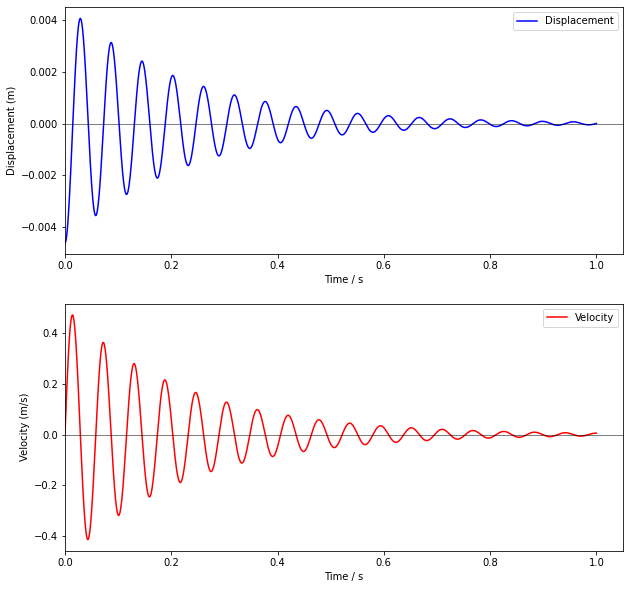

In [30]:
#Import my favourite librarys :)
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


gas = ""

#The desired gas is entered 
while gas!="1" and gas!="2" and gas!="3" :
    gas = input("select from the following gases (1, 2 or 3):\n 1) Nitrogen\n 2) Carbon Dioxide\n 3) Helium\n")

if gas=="1":
    SHR=1.40 #specific heat ratio of Nitrogen
elif gas=="2":
    SHR=0.918 #specific heat ratio of Carbon Dioxide
elif gas=="3":
    SHR=1.667 #specific heat ratio of Helium

#enter the equilibrium/ initial volume
V_i=(10**-6)*float(input("Enter the uncompressed volume of the gas in the tube in ml\n"))

#damping constant based upon the anaylisis of the data in a future model this will be altered to be accurate 
#for a specific gas
c=0.9 #This is just a placeholder value so the program works for now.

v=0 #velocity
m=0.1 #mass of piston and magnet
A=9.155*(10**-4) #Surface area of Pistons face

g=-9.81 #acceleration due to gravity of earth this varies by 0.00055 to +0.00137 m.s-2 in UK which is negligible.

P_i=101325+(m*g/A) #Initial pressure
R=8.3144598 # molar gas constant
T=293 #Room tempurature (Assumed to be constant)

k=(SHR*P_i*(A**2))/V_i #"Spring constant" of the gas

t=0 #initial time starts at 0 seconds
y=-(5*(10**-6))/A #Initial displacement (Compressed by 5ml)

dt=0.0001 #Small change in time

time=[] #array for the values of time
displacement=[] #array for the diplacement from the equilibrium position
velocity=[]#array for the velocity of the piston

#create a while loop that goes up to 30 seconds, it calculates the displacement and velocity at each of the time intervals
while t<1:
    #The values calculated are added to the list of time, displacement and velocity
    time.append(t)
    displacement.append(y)
    velocity.append(v)
    F_up=k*y #Force due to the "Spring"
    F_down=m*g #Force due to weight 
    F_friction=c*v #Force due to friction/ air resistance
    F_tot=( -F_up+F_down-F_friction) #Total force is sum of forces (all act in same line)

    a=F_tot/m #Newtons second law gives us the acceleration from these forces
    v= v + a*dt #velocity can be calculated using the acceleration
    y= y + v*dt #displacement can be calculated using the velocity
    #time is incremented
    t=t+dt
    
    
#Hmm the Displacement seems to be off by a bit and i have no clue why. So untill a theorotician can
#Look at my code and help me fix it im just going to correct for it afterwards...
#This is probably not the best way to do it since the position vector can effect the force but it doesnt seem to effect it that much
# so it works for not
t=0
tot=0
for i in range(len(time)):
    tot+=displacement[i]
    
mean = tot/len(time)

for i in range(len(time)):
    displacement[i]=(displacement[i]-mean)
    
    
#Create some sexy plots for Displacement and Velocity to help visualise what is going on in the simulation so far
fig, (ax1, ax2) =plt.subplots(2, figsize=(10,10))

#Plot 1 for the displacement
ax1.plot(time,displacement, "b", label = "Displacement")
ax1.axhline(0, color = "black", linewidth = 0.5)
ax1.set_ylabel("Displacement (m)")
ax1.legend(loc = "upper right")
ax1.set_xlabel("Time / s")
ax1.set_xlim(xmin=0)

#Plot 2 for the velocity
ax2.plot(time,velocity, "r", label = "Velocity")
ax2.axhline(0, color = "black", linewidth = 0.5)
ax2.set_ylabel("Velocity (m/s)")
ax2.legend(loc = "upper right")
ax2.set_xlabel("Time / s")
ax2.set_xlim(xmin=0)
